In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.3
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_0.3_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_0.3_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.8949

Best Fitness:	943.3781
Solution:	900.0000
Diff:		43.3781

[0:03:48][----------] 1.96% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	974.7498

Best Fitness:	941.7022
Solution:	900.0000
Diff:		41.7022

[0:06:56][----------] 3.92% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	978.2480

Best Fitness:	932.7768
Solution:	900.0000
Diff:		32.7768

[0:10:00][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	978.9602

Best Fitness:	936.0893
Solution:	900.0000
Diff:		36.0893

[0:13:22][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	976.9900

Best Fitness:	941.5136
Solution:	900.0000
Diff:		41.5136

[0:16:28][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.9381

Best Fitness:	940.2230
Solution:	900.0000
Diff:		40.2230

[0:19:50][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	971.7458

Best Fitness:	938.8929
Solution:	900.0000
Diff:		38.8929

[0:22:51][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	976.4194

Best Fitness:	948.1426
Solution:	900.0000
Diff:		48.1426

[0:26:19][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.3835

Best Fitness:	937.0991
Solution:	900.0000
Diff:		37.0991

[0:29:45][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.7804

Best Fitness:	927.6163
Solution:	900.0000
Diff:		27.6163

[0:32:50][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	976.7293

Best Fitness:	944.4900
Solution:	900.0000
Diff:		44.4900

[0:36:12][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	977.7108

Best Fitness:	944.0746
Solution:	900.0000
Diff:		44.0746

[0:39:10][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	978.8853

Best Fitness:	942.6354
Solution:	900.0000
Diff:		42.6354

[0:42:01][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	976.1274

Best Fitness:	934.9509
Solution:	900.0000
Diff:		34.9509

[0:44:47][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	981.8053

Best Fitness:	941.8682
Solution:	900.0000
Diff:		41.8682

[0:47:26][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	976.4586

Best Fitness:	939.6840
Solution:	900.0000
Diff:		39.6840

[0:50:22][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.0440

Best Fitness:	938.1551
Solution:	900.0000
Diff:		38.1551

[0:53:04][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	969.3719

Best Fitness:	930.9014
Solution:	900.0000
Diff:		30.9014

[0:55:46][####------] 35.29% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.8142

Best Fitness:	938.7195
Solution:	900.0000
Diff:		38.7195

[0:58:39][####------] 37.25% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	982.8945

Best Fitness:	948.6362
Solution:	900.0000
Diff:		48.6362

[1:01:12][####------] 39.22% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	972.4187

Best Fitness:	943.8745
Solution:	900.0000
Diff:		43.8745

[1:03:53][####------] 41.18% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	977.2976

Best Fitness:	939.2733
Solution:	900.0000
Diff:		39.2733

[1:06:36][####------] 43.14% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	979.8955

Best Fitness:	940.9718
Solution:	900.0000
Diff:		40.9718

[1:09:23][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	970.1761

Best Fitness:	934.9511
Solution:	900.0000
Diff:		34.9511

[1:12:10][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	975.4609

Best Fitness:	945.4734
Solution:	900.0000
Diff:		45.4734

[1:14:48][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	978.1001

Best Fitness:	949.9726
Solution:	900.0000
Diff:		49.9726

[1:17:32][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	982.9978

Best Fitness:	948.4076
Solution:	900.0000
Diff:		48.4076

[1:20:36][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	975.5677

Best Fitness:	946.3675
Solution:	900.0000
Diff:		46.3675

[1:23:16][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	976.9743

Best Fitness:	950.9003
Solution:	900.0000
Diff:		50.9003

[1:25:56][######----] 56.86% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.7798

Best Fitness:	932.6339
Solution:	900.0000
Diff:		32.6339

[1:28:58][######----] 58.82% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	972.7407

Best Fitness:	938.5781
Solution:	900.0000
Diff:		38.5781

[1:31:57][######----] 60.78% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.6028

Best Fitness:	940.8764
Solution:	900.0000
Diff:		40.8764

[1:34:26][######----] 62.75% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.8384

Best Fitness:	935.4228
Solution:	900.0000
Diff:		35.4228

[1:36:56][######----] 64.71% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	976.5721

Best Fitness:	937.8340
Solution:	900.0000
Diff:		37.8340

[1:39:33][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	976.7422

Best Fitness:	945.6228
Solution:	900.0000
Diff:		45.6228

[1:41:50][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	974.1142

Best Fitness:	934.2313
Solution:	900.0000
Diff:		34.2313

[1:44:16][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	982.5105

Best Fitness:	952.2553
Solution:	900.0000
Diff:		52.2553

[1:46:39][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.3551

Best Fitness:	936.4151
Solution:	900.0000
Diff:		36.4151

[1:49:12][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.1128

Best Fitness:	936.0336
Solution:	900.0000
Diff:		36.0336

[1:51:32][########--] 76.47% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	974.0661

Best Fitness:	938.7754
Solution:	900.0000
Diff:		38.7754

[1:53:51][########--] 78.43% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	971.9314

Best Fitness:	936.7252
Solution:	900.0000
Diff:		36.7252

[1:56:08][########--] 80.39% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.8508

Best Fitness:	937.2393
Solution:	900.0000
Diff:		37.2393

[1:58:45][########--] 82.35% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	966.4364

Best Fitness:	932.8051
Solution:	900.0000
Diff:		32.8051

[2:01:04][########--] 84.31% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	983.7601

Best Fitness:	953.8726
Solution:	900.0000
Diff:		53.8726

[2:03:31][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	982.1436

Best Fitness:	950.1161
Solution:	900.0000
Diff:		50.1161

[2:06:01][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	984.6121

Best Fitness:	948.3753
Solution:	900.0000
Diff:		48.3753

[2:08:31][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	975.8017

Best Fitness:	936.8808
Solution:	900.0000
Diff:		36.8808

[2:11:01][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	971.9455

Best Fitness:	933.5215
Solution:	900.0000
Diff:		33.5215

[2:13:32][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	973.8440

Best Fitness:	939.3082
Solution:	900.0000
Diff:		39.3082

[2:16:03][##########] 96.08% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	975.9721

Best Fitness:	932.4654
Solution:	900.0000
Diff:		32.4654

[2:18:25][##########] 98.04% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	967.4464

Best Fitness:	919.6896
Solution:	900.0000
Diff:		19.6896

[2:20:58][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:20:58

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
93,56.217619,61.773613,19.689558,70.087307,68.976271,78.68234,47.859496,52.957225,67.668346,64.964695,...,63.401194,71.557022,71.799331,66.532061,81.107223,73.246617,69.114724,79.123537,77.523441,50
94,56.217619,61.773613,19.689558,70.087307,68.976271,78.68234,47.859496,52.957225,67.668346,64.964695,...,63.401194,71.557022,71.799331,66.532061,81.107223,73.246617,69.114724,79.123537,77.523441,50
95,56.217619,61.773613,19.689558,70.087307,68.976271,78.68234,47.859496,52.957225,67.668346,64.964695,...,63.401194,71.557022,71.799331,66.532061,81.107223,73.246617,69.114724,79.123537,77.523441,50
96,56.217619,61.773613,19.689558,70.087307,68.976271,78.68234,47.859496,52.957225,67.668346,64.964695,...,63.401194,71.557022,71.799331,66.532061,81.107223,73.246617,69.114724,79.123537,77.523441,50
97,56.217619,61.773613,19.689558,70.087307,68.976271,78.68234,47.859496,52.957225,67.668346,64.964695,...,63.401194,71.557022,71.799331,66.532061,81.107223,73.246617,69.114724,79.123537,77.523441,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 43.37810268968792

Best error for run 1: 41.70221445755999

Best error for run 2: 32.776837846305966

Best error for run 3: 36.08931988687084

Best error for run 4: 41.5136121807617

Best error for run 5: 40.22300390447185

Best error for run 6: 38.89285262493854

Best error for run 7: 48.14256881943106

Best error for run 8: 37.099115462481905

Best error for run 9: 27.616347355891094

Best error for run 10: 44.49000060615083

Best error for run 11: 44.0746365892428

Best error for run 12: 42.635350588100664

Best error for run 13: 34.95090892233986

Best error for run 14: 41.86822112555922

Best error for run 15: 39.68398414537319

Best error for run 16: 38.15509400512758

Best error for run 17: 30.90138211799058

Best error for run 18: 38.71948914896632

Best error for run 19: 48.636183368310185

Best error for run 20: 43.87446874986085

Best error for run 21: 39.273318389642554

Best error for run 22: 40.97179121004274

Best error for run 23: 34.95107348670672

Best error for run 24: 45.47337152909631

Best error for run 25: 49.972591277080255

Best error for run 26: 48.40759625144756

Best error for run 27: 46.36745151241337

Best error for run 28: 50.90031119203263

Best error for run 29: 32.633884625009614

Best error for run 30: 38.5781037377385

Best error for run 31: 40.87635359260287

Best error for run 32: 35.42275538525655

Best error for run 33: 37.83396364885584

Best error for run 34: 45.62276833191925

Best error for run 35: 34.231331605171135

Best error for run 36: 52.255347984241894

Best error for run 37: 36.41513534845831

Best error for run 38: 36.03355067180712

Best error for run 39: 38.77544360274305

Best error for run 40: 36.72517154182924

Best error for run 41: 37.239328619834964

Best error for run 42: 32.80506865447637

Best error for run 43: 53.87258745000554

Best error for run 44: 50.116125806813216

Best error for run 45: 48.37527417607021

Best error for run 46: 36.880809049162735

Best error for run 47: 33.52150510003116

Best error for run 48: 39.30818751879224

Best error for run 49: 32.46542671216764

Best error for run 50: 19.689557557073158

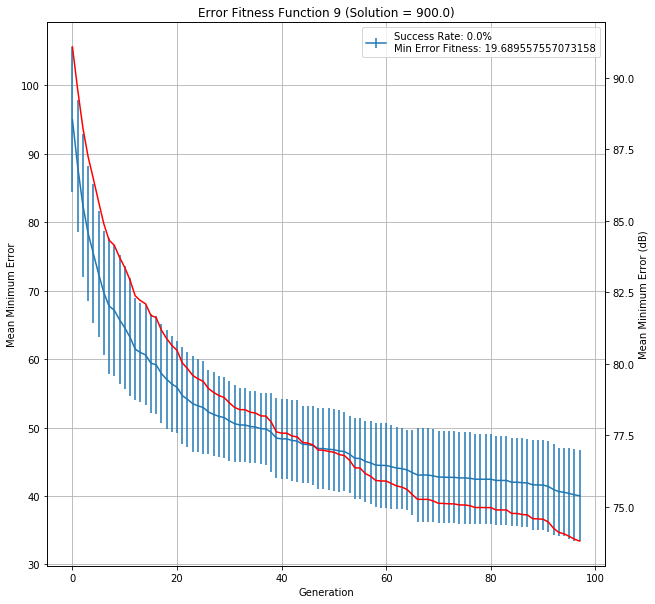

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_0.3_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,0.3,43.378103,41.702214,32.776838,36.08932,41.513612,40.223004,...,50.116126,48.375274,36.880809,33.521505,39.308188,32.465427,19.689558,40.027821,2:20:58,30000
